In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

In [2]:
path = r'D:\Data_Analytics\Project 3\Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
99182,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
99183,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
99184,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
99185,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


In [3]:
frame.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
audi_one_hot = pd.get_dummies(frame, columns =['model', 'transmission', 'fuelType'])
audi_one_hot.head()
### END SOLUTION

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = audi_one_hot.drop(['price'],axis=1)
y = audi_one_hot["price"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(99187, 209) (99187, 1)


In [6]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [7]:
# from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [8]:
# # Transform the training and testing data using the X_scaler and y_scaler models

# ### BEGIN SOLUTION
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)
# ### END SOLUTION

k: 1, Train/Test Score: 0.999/0.257
k: 3, Train/Test Score: 1.000/0.446
k: 5, Train/Test Score: 1.000/0.470
k: 7, Train/Test Score: 1.000/0.479
k: 9, Train/Test Score: 1.000/0.482
k: 11, Train/Test Score: 1.000/0.480
k: 13, Train/Test Score: 1.000/0.479
k: 15, Train/Test Score: 1.000/0.478
k: 17, Train/Test Score: 1.000/0.475
k: 19, Train/Test Score: 1.000/0.473


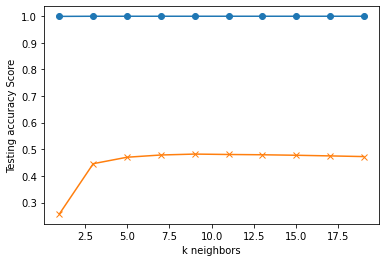

In [9]:
from sklearn.neighbors import KNeighborsRegressor

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [10]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.451
